# The Motion of a Charged Particle in a Magnetic Field

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib notebook




def uniformLorentzForce(velocity, magnetic_field):
    return np.cross(velocity, magnetic_field)

c = 299792458  # m/s
method = 'RK45'
zeroV = np.array([0, 0, 0])
kHat = np.array([0, 0, 1])
forces = [uniformLorentzForce(zeroV, kHat)]
mass = 1.672621898e-27  # kg
charge = 1.602176621e-19  # C
velocity = 0.8 * c
initial_state = np.array([0, 0])  # Initial position


# Define the equations of motion for the particle in the magnetic field
# using relativistic equations
def relativistic_motion(t, state):
    x, y = state
    B = 1  # Magnetic field strength in Tesla
    q = charge
    gamma = 1 / np.sqrt(1 - (velocity / c) ** 2)
    dx_dt = velocity
    dy_dt = (q * velocity * B) / (mass * gamma)
    return [dx_dt, dy_dt]


# Define the equations of motion for the particle in the magnetic field
# using Newton's second law
def newton_second_law(t, state):
    x, y = state
    B = 1  # Magnetic field strength in Tesla
    q = charge
    dx_dt = velocity
    dy_dt = (q * velocity * B) / mass
    return [dx_dt, dy_dt]







<IPython.core.display.Javascript object>


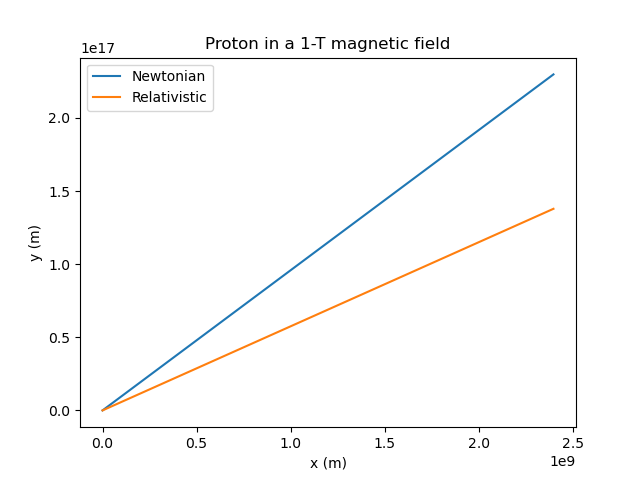

In [3]:

t_span = [0, 10]  # Time interval for simulation



# Solve the equations of motion for the given models
newton_states = solve_ivp(newton_second_law, t_span, initial_state, method=method)
relativity_states = solve_ivp(relativistic_motion, t_span, initial_state, method=method)



# Extract x and y components of positions for plotting
newton_XYs = [newton_states.y[0], newton_states.y[1]]
relativity_XYs = [relativity_states.y[0], relativity_states.y[1]]




# Plot the paths of the particles
plt.plot(newton_XYs[0], newton_XYs[1], label='Newtonian')
plt.plot(relativity_XYs[0], relativity_XYs[1], label='Relativistic')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Proton in a 1-T magnetic field')
plt.legend()
plt.savefig('circularComp.png')
plt.show()
